<a href="https://colab.research.google.com/github/duanasq/learning-ds-public/blob/main/block_dei_display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualising representation of genders in tech from Block's public data

See: https://squareup.com/us/en/about/diversity/archive

Datasource: Data was crafted by hand by scraping the following URLs
- https://block.xyz/inclusion/workforce-data-2022
- https://squareup.com/us/en/about/diversity/workforce-data-2021
- https://squareup.com/us/en/about/diversity/archive/workforce-data-2020
- 2018 is missing
- https://squareup.com/us/en/about/diversity/archive/workforce-data-2019
- https://squareup.com/us/en/about/diversity/archive/workforce-data-2017



In [174]:
import numpy as np
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt

In [175]:
df_tech = pd.DataFrame({
    "report_year": [2017, 2018, 2019, 2020, 2021, 2022],
    "non_binary" : [np.nan, np.nan, np.nan, 0.002, 0.003, 0.006],
    "women": [0.188, np.nan, 0.229, 0.232, 0.258, 0.29],
    "men": [0.812, np.nan, 0.771, 0.765, 0.739, 0.704]
})
df_tech

,report_year,non_binary,women,men
0,2017,NaN,0.188,0.812
1,2018,NaN,NaN,NaN
2,2019,NaN,0.229,0.771
3,2020,0.002,0.232,0.765
4,2021,0.003,0.258,0.739
5,2022,0.006,0.290,0.704


## Let's bar chart this up!

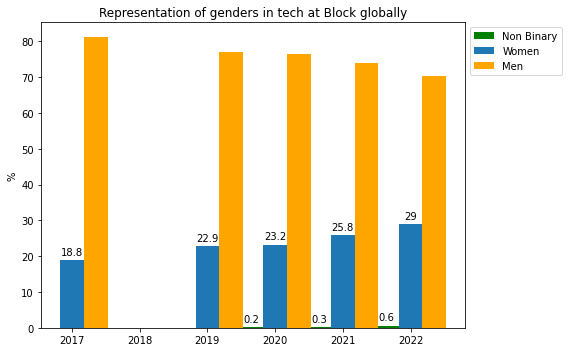

In [176]:
labels = list(df_tech['report_year'])
labels = list(map(str, labels))

women_percentages = df_tech["women"].values * 100
non_binary_percentages = df_tech["non_binary"].values * 100
men_percentages = df_tech["men"].values * 100

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[8, 5])
rects1 = ax.bar(x - width, non_binary_percentages, width=width, label='Non Binary', color='green')
rects2 = ax.bar(x, women_percentages, width=width, label='Women', color='tab:blue')
rects3 = ax.bar(x + width, men_percentages, width=width, label='Men', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('Representation of genders in tech at Block globally')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1, 1))

if(matplotlib.__version__ >= "3.4.0"):
  ax.bar_label(rects1, padding=3)
  ax.bar_label(rects2, padding=3)
else:
  def autolabel(rects):
      """Attach a text label above each bar in *rects*, displaying its height."""
      for rect in rects:
          height = rect.get_height()
          ax.annotate("{:.1f}".format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')


  autolabel(rects1)
  autolabel(rects2)

fig.tight_layout()

## Find the line of best fit!

Disclaimers!

This is a very simple prediction that assumes linear growth, and that is extrapolating far beyond the range of available data. Who knows, if we build enough momentum (having more women employees attracts more women employees), we might very well grow representation faster than linear!  … but there are always lots of hurdles we might encounter over the next decade as well.
(Quoted from a colleague.)

When you have gently sloping lines, a tiny margin of error in the slope can mean a big error in the intersection point. Another source of error is in the data collection, and is hard to know - people may not report their gender.
(Quoted from a colleague.)

If you want to work on a better prediction, please reach out!

In [177]:
df_tech_no_nans = df_tech.dropna(subset=['women'])
x = df_tech_no_nans["report_year"].values
y = df_tech_no_nans["women"].values * 100
(x,y)

(array([2017, 2019, 2020, 2021, 2022]), array([18.8, 22.9, 23.2, 25.8, 29. ]))

In [178]:
import statsmodels.api as sm
x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const)
results = model.fit()
#print(results.summary())
print(results.params)

[-3.85735135e+03  1.92162162e+00]


The first parameter is where the line crosses the y axis (so we had -3329% of women at the year 0) and the second parameter is the gradient (so we currently gain 1.66% representation of women a year).

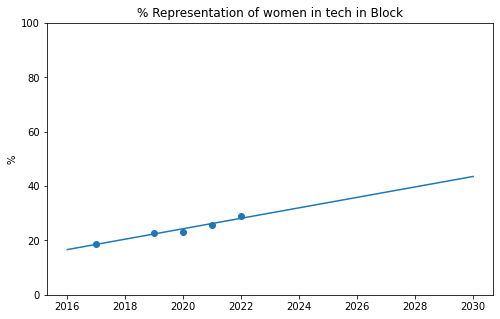

In [179]:
x2 = np.linspace(2016, 2030)
y2 = x2 * results.params[1] + results.params[0] 
fig, ax = plt.subplots(figsize=[8, 5])
ax.scatter(x,y)
ax.plot(x2,y2)
ax.set_ylim(0,100)
ax.set_ylabel("%")
ax.set_title("% Representation of women in tech in Block")
plt.show()


## When do we reach balanced representation of women? 

Advice from a colleague: "Since we don't know how much of the population will choose to come out as nonbinary we can consider women genderbalanced with men when both groups are of equal amount (regardless of what that amount is). So you could plot the women and men lines and see where they intersect."

In [180]:
df_tech_no_nans_men = df_tech.dropna(subset=['men'])
x_men = df_tech_no_nans["report_year"].values
y_men = df_tech_no_nans["men"].values * 100
(x_men, y_men)

(array([2017, 2019, 2020, 2021, 2022]), array([81.2, 77.1, 76.5, 73.9, 70.4]))

In [181]:
x_with_const_men = sm.add_constant(x_men)
model_men = sm.OLS(y_men, x_with_const_men)
results_men = model_men.fit()
#print(results.summary())
print(results_men.params)

[ 4.19457432e+03 -2.03918919e+00]


In [182]:
# TODO: how can we factor growth in the non-binary representation to this

x_women = np.linspace(2016, 2070)
y_women = x_women * results.params[1] + results.params[0] 

x_men = np.linspace(2016, 2070)
y_men = x_men * results_men.params[1] + results_men.params[0] 

In [183]:
# Where do the lines intersect?

from skspatial.objects import Line

line_a = Line.from_points([x_women[0], y_women[0]], [x_women[-1], y_women[-1]])
line_b = Line.from_points([x_men[0], y_men[0]], [x_men[-1], y_men[-1]])

genderbalanced = line_a.intersect_line(line_b)
genderbalanced

Point([2032.89832822,   49.11003071])

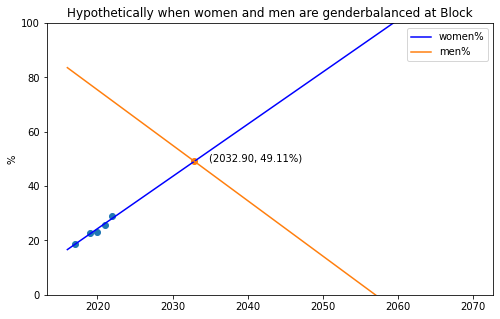

In [189]:
fig, ax = plt.subplots(figsize=[8, 5])
ax.scatter(x,y)
ax.set(ylim=(0, 100))
ax.plot(x_women, y_women, color = 'b', label = "women%")
ax.plot(x_men, y_men, color = 'C1', label = "men%")
ax.set_ylabel("%")
ax.set_title("Hypothetically when women and men are genderbalanced at Block")
ax.scatter([genderbalanced[0]],[genderbalanced[1]])
ax.text(genderbalanced[0]+2,genderbalanced[1],f"({genderbalanced[0]:.2f}, {genderbalanced[1]:.2f}%)")
ax.legend()
plt.show()

If you are interested to collaborate to make this analysis more correct from a data or gender perspective, please reach out! Thanks to the amazing colleagues for initial feedback.